# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
*Write your description here*
## Data Validation and cleaning
    This was done to verify the quality of the dataset. The dataset did not match the description given in the instruction document; so data cleaning and preprocessing was done. The weight column had 20 missing values present and they were treated with sklearn's 'SimpleImputer' method with mean strategy in order to fill in the overall average weight of the field. Normalized the 'day_of_week', 'category', and 'days_before' columns to make values uniform across all observations and matching their description given for the project.
    The dataset also contains some outliers identified in the 'weight', 'months_as_member', 'days_before' columns using a boxplot.

In [67]:
# Start coding here... 

In [68]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [69]:
#Data Validation
df = pd.read_csv('fitness_class_2212.csv')

print(df.head(10))

   booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   
5           6                 7   93.33           2         Mon   AM   
6           7                11   88.59           6   Wednesday   PM   
7           8                 9   89.52          10         Fri   AM   
8           9                23   71.12          10        Fri.   AM   
9          10                 7   81.25          10         Fri   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0  
5   Cycling         0  
6      HIIT         0  
7      HIIT    

In [70]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [72]:
#check unique values of each column
print("day of week column\n", df['day_of_week'].value_counts())
print("Days before column\n", df['days_before'].value_counts())
print("Time column\n", df['time'].value_counts())
print("Category column\n", df['category'].value_counts())
print("Attended column\n", df['attended'].value_counts())
print("Month as member column\n", df['months_as_member'].value_counts())
print("Weight column\n", df['weight'].value_counts())

day of week column
 Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
Days before column
 10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Time column
 AM    1141
PM     359
Name: time, dtype: int64
Category column
 HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
Attended column
 0    1046
1     454
Name: attended, dtype:

In [73]:
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [74]:
#Data Cleaning
df['day_of_week'] = df['day_of_week'].replace({'Monday':'Mon', 'Wednesday':'Wed', 'Fri.':'Fri'})
df['category'] = df['category'].replace({'-':'unknown'})

# Extract numerical values from the 'days_before' column using regex pattern
df['days_before'] = df['days_before'].str.extract('(\d+)', expand=False)

print(df['day_of_week'].value_counts())
print(df['days_before'].value_counts())
print(df['category'].value_counts())

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64
10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64


In [75]:
#Change data type of days_before
df['days_before'] = df['days_before'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


In [76]:
#Replace missing values in columns with the overall average weight.
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy="mean")

In [77]:
# Pre-process the data to handle missing values

df['weight'] = mean_imputer.fit_transform(df[['weight']])

In [78]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [79]:
print(df.duplicated().value_counts())

False    1500
dtype: int64


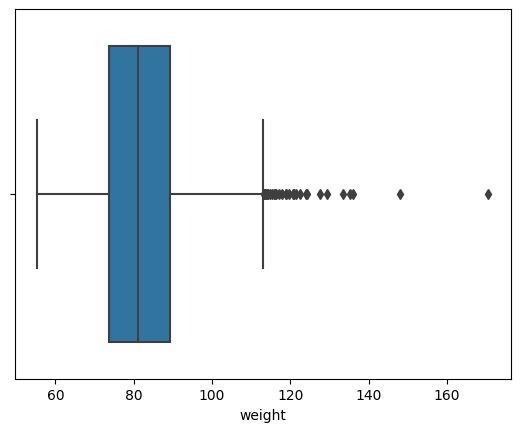

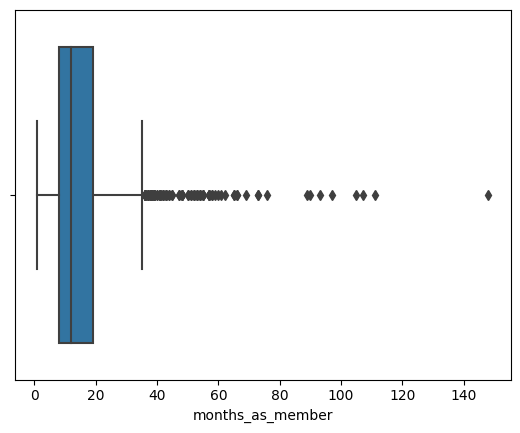

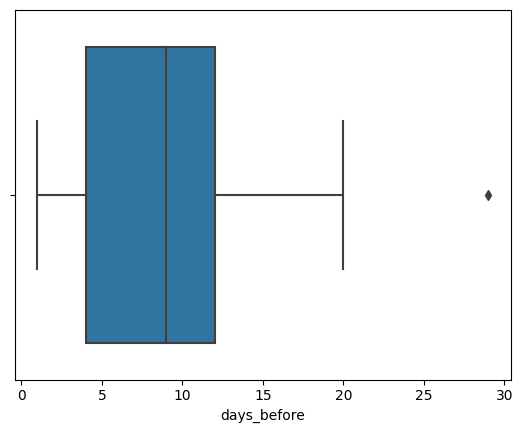

In [80]:
x_axis = df[['weight', 'months_as_member', 'days_before']]

for value in x_axis.columns:
    sns.boxplot(df, x=value)
    plt.show()

## Task 2
*Write your description here*
## Data Exploration and Visualisation
    - Exploratory data analysis was done and visualisations were used to show relationship between variables in the dataset.
    - The attended column had two variables 0 and 1; which records whether the member attended the class (1) or not (0). Variable (0) had the most frequency of observations at 1046 and variable (1) was 454 abservations.
    - The dataset shows more observations for training, as 'not attended'. Therefore, the observations of this variable category is imbalanced with approx. 70:30 ratio.  

Attended column value counts
 0    1046
1     454
Name: attended, dtype: int64


<AxesSubplot: >

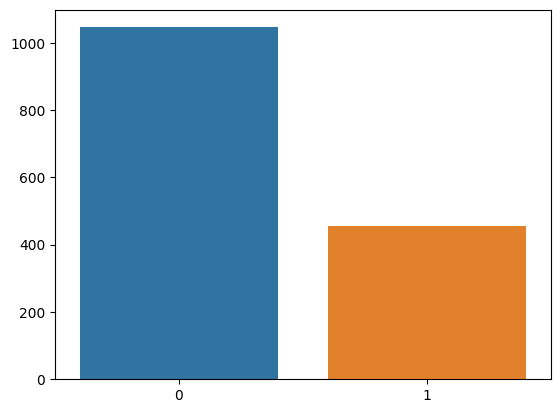

In [81]:
#state category of the variable attended has the most observations
counts=df['attended'].value_counts()
print('Attended column value counts\n', counts)

#plot the diffecnce
sns.barplot(df, x=counts.index, y=counts.values)

## Task 3
*Write your description here*
## Describe the distribution of the number of months as a member
    The histograms show the members were positively right skewed on the graph in terms of the months_as_member column. This shows that most of the members had between 1-20 months of fitness club membership. It also shows very few had high number of months, causing the long tail at the end of the distribution. 

<AxesSubplot: xlabel='months_as_member', ylabel='Count'>

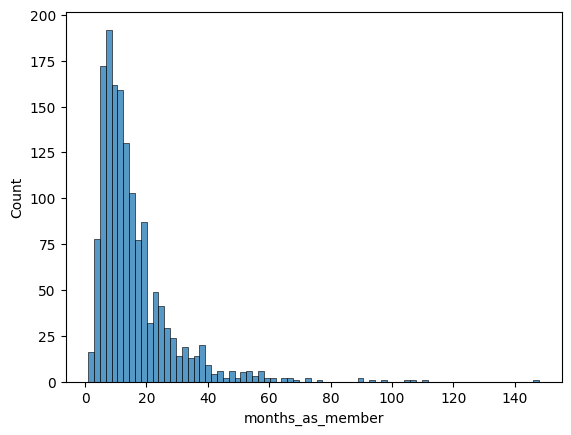

In [82]:
#histogram for the distribution of the number of months as a member
sns.histplot(df, x=df['months_as_member'])

## Task 4
*Write your description here*
## Correlation
    For the relationship between 'attendance' and 'number of months as a member', a correlation plot was created to display the correlation between pairs of columns in the dataframe; where values close to 1 indicate strong positive correlation and values close to -1 indicate strong negative correlation. The resulting matrix was visualised in a heatmap and it showed a weak positive correlation between 'attendance' and 'number of months as a member' at 0.49.

In [83]:
#correlation matrix
Correlation_matrix = df.corr()

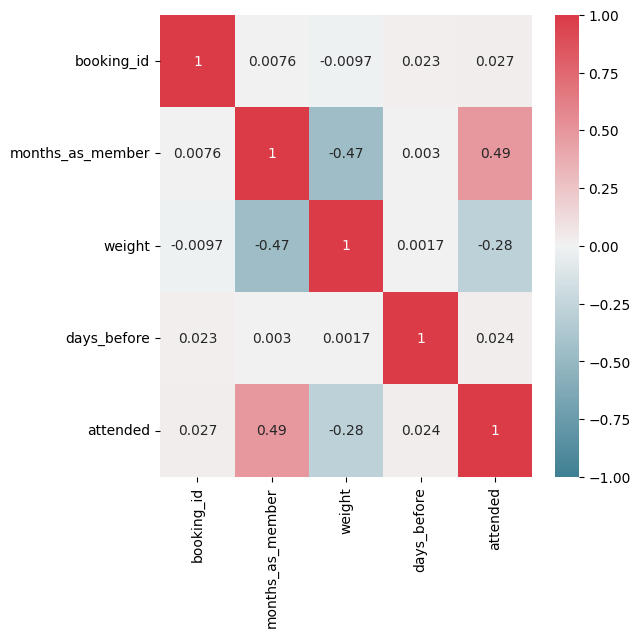

In [84]:
# Create a heatmap of the correlation matrix using Matplotlib
plt.figure(figsize=(6,6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap=cmap)
plt.show()

## Task 5
*Write your description here*
## State the type of machine learning problem that this is?
    The type of problem this is, is described as binary classification problem.. where the objective is to predict if a member will attend the class or not. 

In [85]:
#Model Development
#Binary Classification Problem
#import packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Convert categorical variables to numerical
#get dummy
df_dummy = pd.get_dummies(df, columns=["category", 'day_of_week', 'time'])

df_dummy

,booking_id,months_as_member,weight,days_before,attended,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_unknown,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM
0,1,17,79.560000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2,10,79.010000,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,3,16,74.530000,14,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,4,5,86.120000,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5,15,69.290000,8,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,6,7,93.330000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
6,7,11,88.590000,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
7,8,9,89.520000,10,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
8,9,23,71.120000,10,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
9,10,7,81.250000,10,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [87]:
#Choose relevant columns
#Define the features and target variable
X = df_dummy.drop(['attended'], axis=1)
y = df_dummy['attended']

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (1200, 19)
train size y :  (1200,)
test size X :  (300, 19)
test size y :  (300,)


## Task 6
*Write your description here*
## Fit and predict on baseline model
    This was done to fit baseline model and predict whether members will attend or not.

In [89]:
# Start coding here... 

In [90]:
baseline_model = LogisticRegression(random_state=3)
comparison_model = RandomForestClassifier(random_state=3)

In [91]:
baseline_model.fit(X_train, y_train)

LogisticRegression(random_state=3)

In [92]:
# Evaluate the model on the test set
log_reg_pred = baseline_model.predict(X_test)

## Task 7
*Write your description here*
## Fit and transform comparison model
    This was done to fit baseline model and predict whether members will attend or not.

In [93]:
# Start coding here... 

In [94]:
comparison_model.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [95]:
# Evaluate the model on the test set
forest_pred = comparison_model.predict(X_test)

## Task 8
*Write your description here*
## Description
    - Logistic Regression was picked bescause it is widely used model for binary classification problems.
    - Random Forest was picked as a comparison model to combine multiple decision trees to improve the model's performance and reduce overfitting.

## Task 9
*Write your description here*
## Model Exaluation
    - The classification report to evaluate the models; showing the precision, recall, f1, and accuracy scores.

In [96]:
# Create the classification report for the models
from sklearn.metrics import classification_report

class_rep_log_reg = classification_report(y_test, log_reg_pred)
class_rep_forest = classification_report(y_test, forest_pred)

In [97]:
print("Logistic Regression: \n", class_rep_log_reg)
print("Random Forest: \n", class_rep_forest)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       210
           1       0.73      0.50      0.59        90

    accuracy                           0.79       300
   macro avg       0.77      0.71      0.73       300
weighted avg       0.79      0.79      0.78       300

Random Forest: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       210
           1       0.64      0.50      0.56        90

    accuracy                           0.77       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300



## Task 10
*Write your description here*
## Model Evaluation
    - The classification report shows the baseline Logistic Regression model out performs the comparison model.. 
    - Looking at the accuracy score below, we can evalaute this..

In [98]:
from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(y_test, log_reg_pred)
forest_acc = accuracy_score(y_test, forest_pred)

In [99]:
print("The Logistic regression model accuracy score is: " + str(log_reg_acc))
print("The Random forest model accuracy score is: " + str(forest_acc))

The Logistic regression model accuracy score is: 0.7933333333333333
The Random forest model accuracy score is: 0.7666666666666667


## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam